#### Ciência de Dados com Python/IA - SENAI-DF - Vespertino - 13/08/2024 - Marcelo Pereira Avelino

**Tema Principal:** Revisão da Introdução ao Flask e Jinja2

## Conceitos Práticos

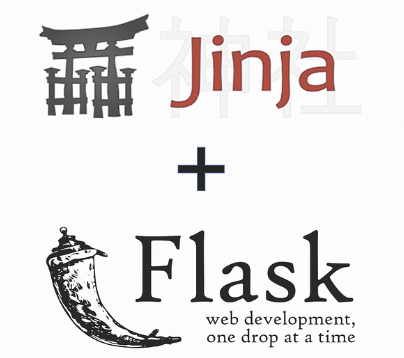

### Jinja2
- **Jinja2** é um mecanismo de template (template engine) para Python que permite a criação de HTML dinâmico com código Python embutido.
- Usado para gerar arquivos HTML a partir de variáveis, loops e condições, tornando o conteúdo web mais dinâmico.
- Sintaxe:
  - `{{ ... }}`: Exibe o valor de uma variável ou expressão.
  - `{% ... %}`: Controla fluxos lógicos, como loops e condicionais.
  - `{# ... #}`: Adiciona comentários que não são exibidos no HTML.

### Flask
- **Flask** é um microframework web para Python, usado para criar aplicações web.
- Focado na simplicidade e facilidade de uso, permitindo criar rotas (URLs) e renderizar templates HTML com Jinja2.
- Permite a criação de APIs e sites dinâmicos com suporte para extensões, como autenticação e bancos de dados.

### Complemento da Aula de Sexta-Feira (09/08/2024) - Introdução ao Flask

**Conteúdo Revisado:**
- Revisamos o que foi abordado na última aula sobre **Flask**, um microframework em Python para o desenvolvimento de aplicações web.
- Discutimos como configurar um projeto básico em Flask, que inclui a criação de rotas e templates HTML, assim como a estrutura básica de um aplicativo Flask.

### Inclusão de CSS para Estilização da Página HTML

***Estrutura de Diretórios Atualizada:**
- Foi introduzida a estrutura de diretórios para suportar arquivos estáticos como CSS.
  - Dentro do diretório principal do projeto, foi criado um diretório chamado `static`.
  - Dentro de `static`, foi criado um subdiretório chamado `css`.
  - Dentro de `css`, foi criado o arquivo `style.css` que contém as regras de estilização para a página HTML.

  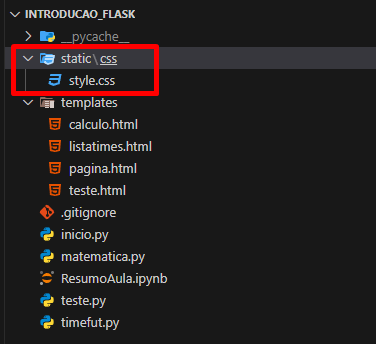

**Configuração do Template HTML:**

- 1. Para que o Flask reconheça o CSS, foi necessário incluir a linha abaixo dentro da tag `<head>` do arquivo `listatimes.html` (Introducao_Flask - 09/08/2024):

```html
<link rel="stylesheet" href="{{ url_for('static', filename='css/style.css') }}">
```
* Segue visualização do código do arquivo `listatimes.html` após alteração.

In [ ]:
<!DOCTYPE html>
<html lang="pt-br">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <link rel="stylesheet" href="{{ url_for('static', filename='css/style.css') }}"> <!--> ESSA FOI A LINHA INSERIDA NO ARQUIVO LISTA.TIMES.HTML<!-->
    <title>Lista Times</title>
</head>
<body>
    <h2>Mostrando com um for</h2>
    {% for time in times %} 
        <h6>{{time.nome}}</h6>
        <h6>{{time.vitorias}}</h6>
    {% endfor %}

    <!-- Exibe os times em uma tabela -->
    <h1>Mostrando em uma tabela</h1>
    <table border="3">
        <thead>
            <tr>
                <th>Nome</th>
                <th>Vitórias</th>
            </tr>
        </thead>
        <tbody>
            {% for time in times %} 
               <tr>
                 <td>{{time.nome}}</td>
                 <td>{{time.vitorias}}</td>
               </tr>
            {% endfor %}
        </tbody>
    </table>
</body>
</html>


- 2. Foi criado o arquivo `static\css\style.css` com o seguinte conteúdo, que refletiu na estilização do arquivo `listatimes.html`.

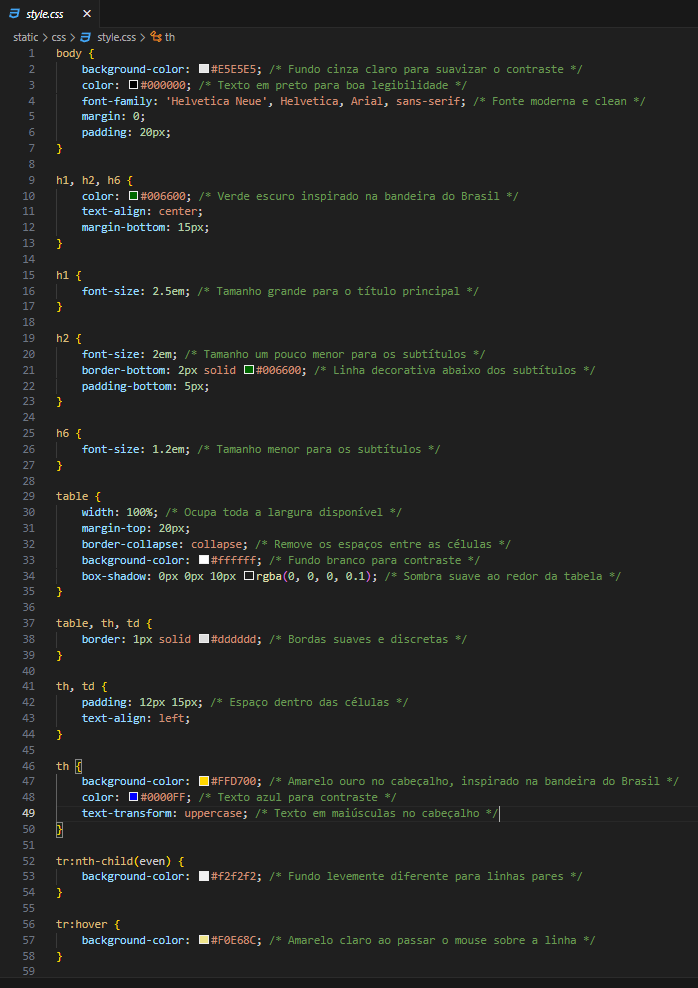

- Após a criaçaõ do arquivo de estilização, a página `listatimes.html` ficou da seguinte forma:
    - Obs: A estilização em CSS é algo pessoal, onde cada um edita a estilização da forma que achar mais adequada.

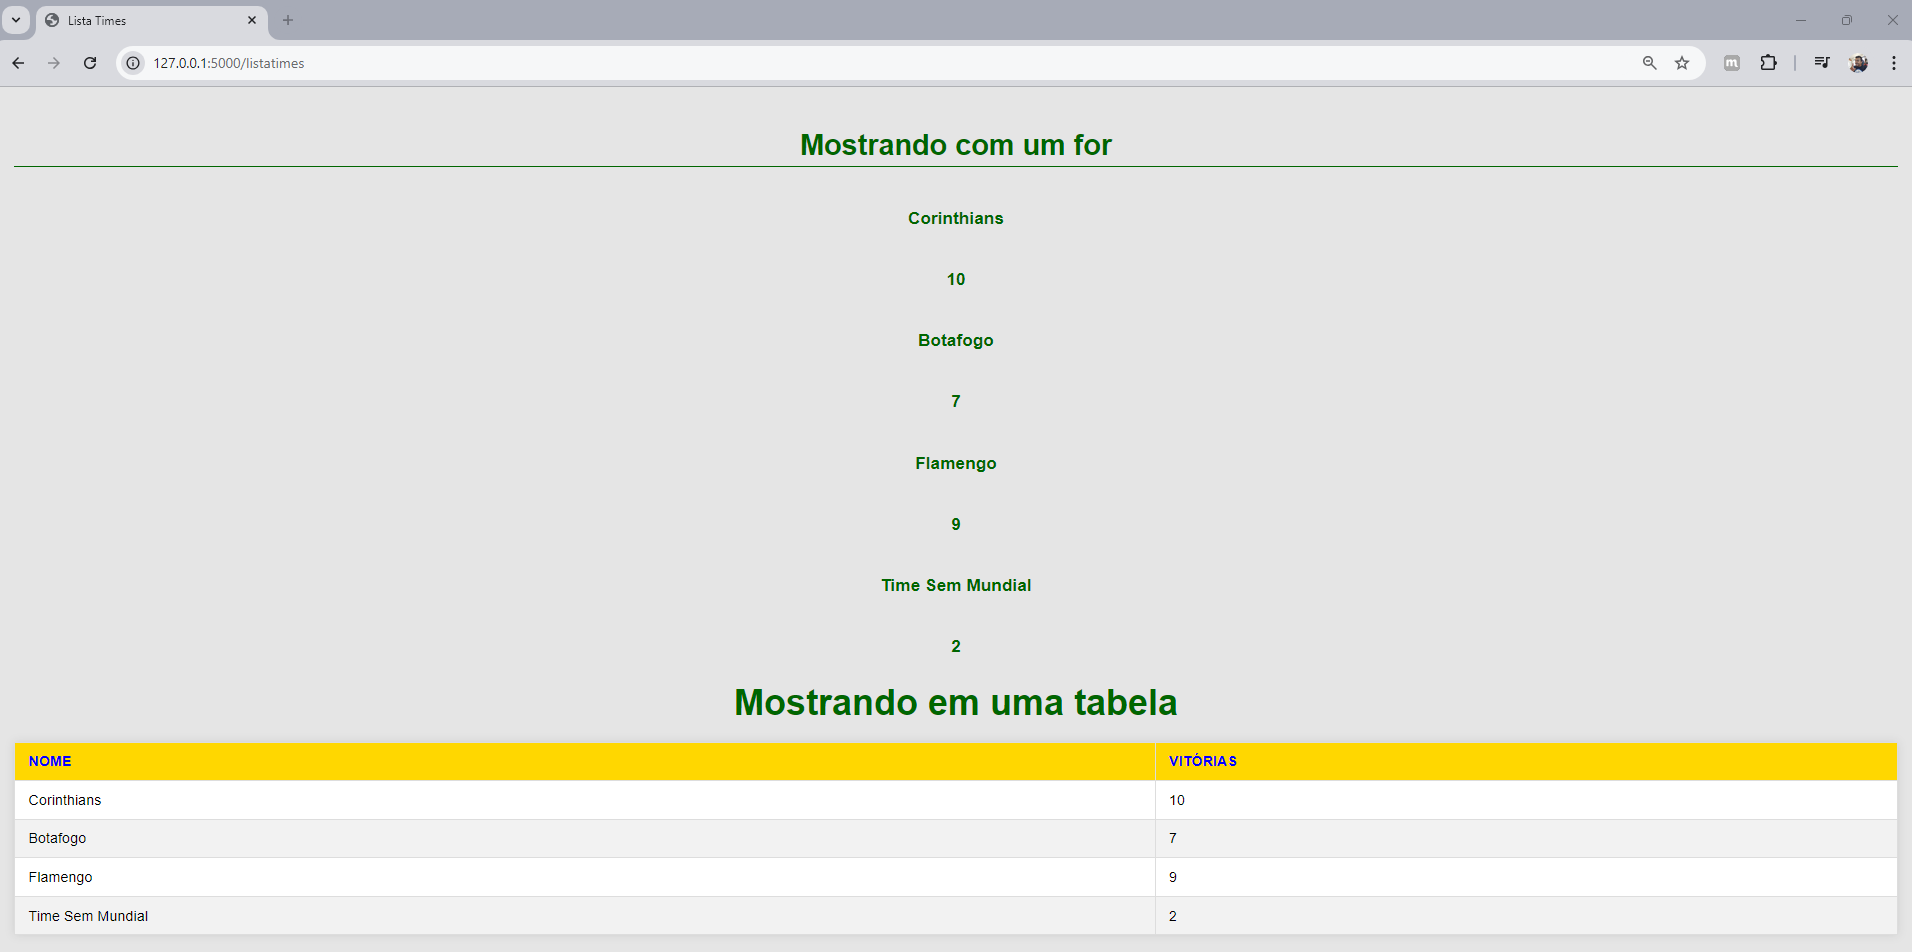

- Para facilitar a execução da aplicação Flask, ao final do arquivo `inicio.py`, a parte do código responsável por iniciar o servidor de desenvolvimento do Flask foi alterada de `app.run()` para `app.run(debug=True)`, permitindo que as alterações na estrutura dos arquivos sejam aplicadas automaticamente sem a necessidade de reiniciar o servidor após cada modificação.

```py
# Este é o arquivo principal da aplicação Flask. Nele, são definidas as rotas (URLs) que a aplicação vai responder e o que será exibido para o usuário em cada uma dessas rotas.

# Importação das bibliotecas necessárias para criar a aplicação Flask
from flask import Flask, render_template # Importando a classe Flask e a função render_template do módulo Flask, que são essenciais para criar a aplicação web e renderizar templates HTML.
from matematica import Matematica # Importando a classe Matematica do arquivo matematica.py. Esta classe será usada para realizar operações matemáticas, como a soma, dentro da aplicação.
from timefut import TimeFut # Importando a classe TimeFut do arquivo timefut.py. Esta classe será utilizada para representar times de futebol com atributos como nome e número de vitórias.

# Inicializa a aplicação Flask
app = Flask(__name__)

# Rota para a URL '/inicio', que vai exibir uma simples mensagem "Olá Mundo!"
@app.route('/inicio')
def ola():
    return "Olá Mundo!"

# Rota para a URL '/olamundo', que vai renderizar o template 'pagina.html'
@app.route('/olamundo')
def mostrar():
    # Aqui, 'titulo_dinamico' é uma variável passada ao template HTML
    return render_template('pagina.html', titulo_dinamico='titulo ok')

# Rota para a URL '/listatimes', que vai renderizar o template 'listatimes.html'
@app.route('/listatimes')
def listar_times():
    # Cria uma lista de objetos 'TimeFut' representando times de futebol
    t1 = TimeFut('Corinthians', 10)
    t2 = TimeFut('Botafogo', 7)
    t3 = TimeFut('Flamengo', 9)
    t4 = TimeFut('Time Sem Mundial', 2)
    lista = [t1, t2, t3, t4]
    return render_template('listatimes.html', times=lista)

# Rota para a URL '/calculosoma', que vai renderizar o template 'calculo.html'
@app.route('/calculosoma')
def calcular():
    # Cria um objeto da classe 'Matematica' e realiza uma soma
    mat = Matematica(9, 9)
    resposta = mat.somar()
    return render_template('calculo.html', resultado=resposta)

# Inicializa o servidor de desenvolvimento do Flask
app.run(debug=True)
```